In [1]:
import json 
import matplotlib
from matplotlib import pyplot as plt
import pickle
import pandas as pd
import numpy as np 
import sklearn 
import statistics
import seaborn as sns
%matplotlib inline
from copy import deepcopy

In [2]:
from numpy import *
from matplotlib.pyplot import *

rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.it'] = 'DejaVu Sans:italic'
rcParams['mathtext.bf'] = 'DejaVu Sans:italic:bold'


In [3]:
mresults_path = f'../predicted-results/mixed5050/skewed'
eresults_path = f'../predicted-results/everything/skewed'

mmodels_path = f'../models/mixed5050/skewed'
emodels_path = f'../models/everything/skewed'

In [4]:
predicted_paths = {'5050': mresults_path, 
                   'everything': eresults_path}

tsets = ['5050', '2575', 'everything']
train_datas = ['5050', 'everything']
targets = ['COF', 'intercept']
sections = ['top', 'bot', 'extrema']

In [5]:
combined_test = pd.read_csv('../../data/splitted-data/everything/nbins-10/test_set.csv', index_col=0)
m2575_test = pd.read_csv('../../data/splitted-data/mixed2575/nbins-10/test_set.csv', index_col=0)
m5050_test = pd.read_csv('../../data/splitted-data/mixed5050/nbins-10/test_set.csv', index_col=0)

In [6]:
doi = dict()
classification = {'5050': 'M1000',
                  'everything': 'E1000'}
for train_set in train_datas:
    doi[train_set] = dict()
    for tset in tsets:
        doi[train_set][tset] = dict()
        for section in sections:
            doi[train_set][tset][section] = dict()
            for target in targets:
                with open(f'{predicted_paths[train_set]}/{section}_1000_{target}_on_{tset}.json') as f:
                    data = json.load(f)
                doi[train_set][tset][section][target] = pd.DataFrame.from_dict(data[target]).transpose().drop('r_square').rename(columns={
                                                                                                                                          'tg-1': 'terminal_group_1',
                                                                                                                                          'tg-2': 'terminal_group_2',
                                                                                                                                          'tg-3': 'terminal_group_3'})
                doi[train_set][tset][section][target].insert(0, 'set', classification[train_set]+section)
                doi[train_set][tset][section][target].insert(0, 'mode', 'Predicted')
                doi[train_set][tset][section][target][target] = doi[train_set][tset][section][target][f'predicted-{target}'].astype('float64')
                
        doi[train_set][tset]['test'] = deepcopy(combined_test)
        doi[train_set][tset]['test'].insert(0, 'set', 'Test')
        doi[train_set][tset]['test'].insert(0, 'mode', 'Simulated')
        doi[train_set][tset]['normal'] = dict()
        for target in targets: 
            with open(f'../predicted-results/everything/nbins-10/set_0/{target}_1000_on_{tset}.json') as f: 
                data = json.load(f) 
            doi[train_set][tset]['normal'][target] = pd.DataFrame.from_dict(data[target]).transpose().drop('r_square').rename(columns={'tg-1': 'terminal_group_1',
                                                                                                                                       'tg-2': 'terminal_group_2',
                                                                                                                                       'tg-3': 'terminal_group_3'})
            doi[train_set][tset]['normal'][target][target] = doi[train_set][tset]['normal'][target][f'predicted-{target}'].astype('float64')

            doi[train_set][tset]['normal'][target].insert(0, 'set', 'Normal')
            doi[train_set][tset]['normal'][target].insert(0, 'mode', 'Predicted')
                    

In [7]:
COF_df = pd.concat([
                    doi['everything']['everything']['test'], 
                    doi['everything']['everything']['normal']['COF'],
                    doi['everything']['everything']['extrema']['COF'],                   
                    doi['everything']['everything']['bot']['COF'],
                    doi['everything']['everything']['top']['COF'],

                   ],
                    ignore_index=True)
F0_df = pd.concat([
                    doi['everything']['everything']['test'],
                    doi['everything']['everything']['normal']['intercept'],
                    doi['everything']['everything']['extrema']['intercept'],
                    doi['everything']['everything']['bot']['intercept'],
                    doi['everything']['everything']['top']['intercept'],

                    ],
                    ignore_index=True)

In [8]:
set(COF_df['set'])
set(COF_df['mode'])

{'Predicted', 'Simulated'}

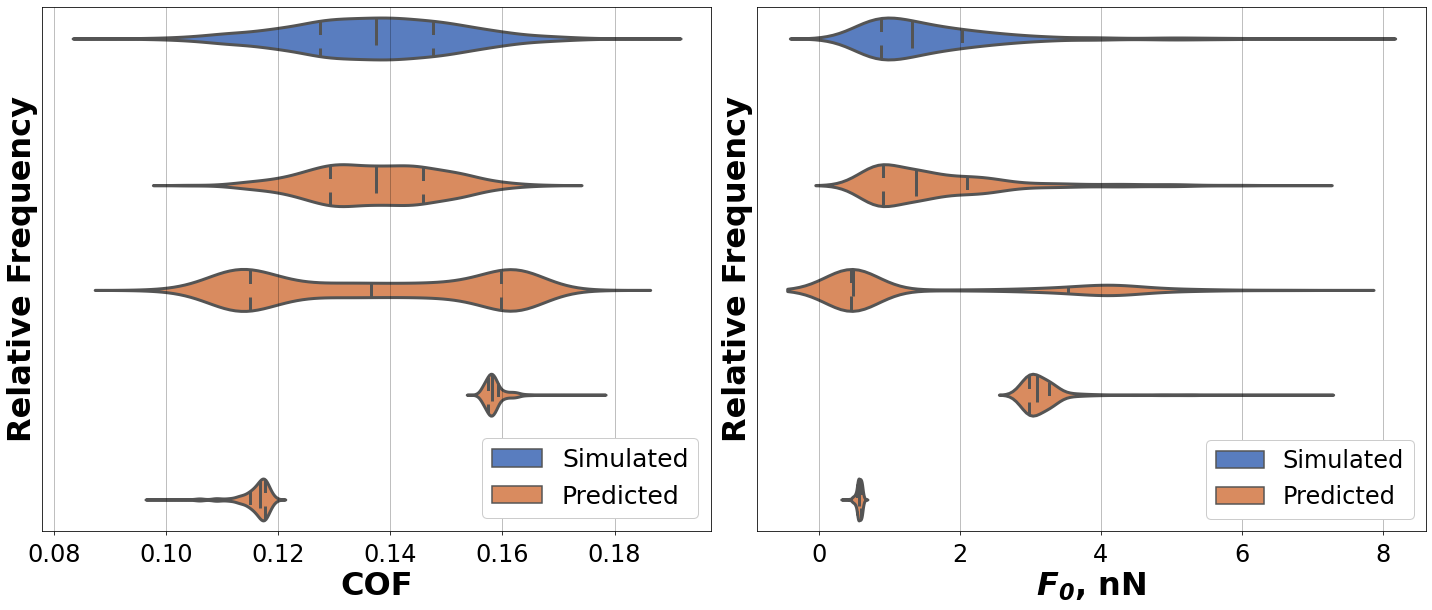

In [9]:
plt.figure(figsize=(20, 16))
plt.subplot(2, 2, 1)
sns.violinplot(x='COF', y='set', data=COF_df, color="0.8", hue='mode', scale='area',
               split=False, palette='muted', inner="quart")
plt.ylabel('Relative Frequency')
plt.xlabel('COF')
#plt.xticks([], color='None')
plt.yticks([], color='None')
plt.legend(loc=4, prop={'size': 25})

plt.subplot(2, 2, 2)
sns.violinplot(x='intercept', y='set', data=F0_df, color="0.8", hue='mode', scale='area',
               split=False, palette='muted', inner="quart")
plt.ylabel('Relative Frequency')
plt.xlabel(r'$\mathbf{F_0}$, nN')
#plt.xticks([], color='None')
plt.yticks([], color='None')
plt.legend(loc=4, prop={'size': 24})
plt.savefig('plots/violin/skewed_models.pdf', dpi=500, bbox_inches='tight')

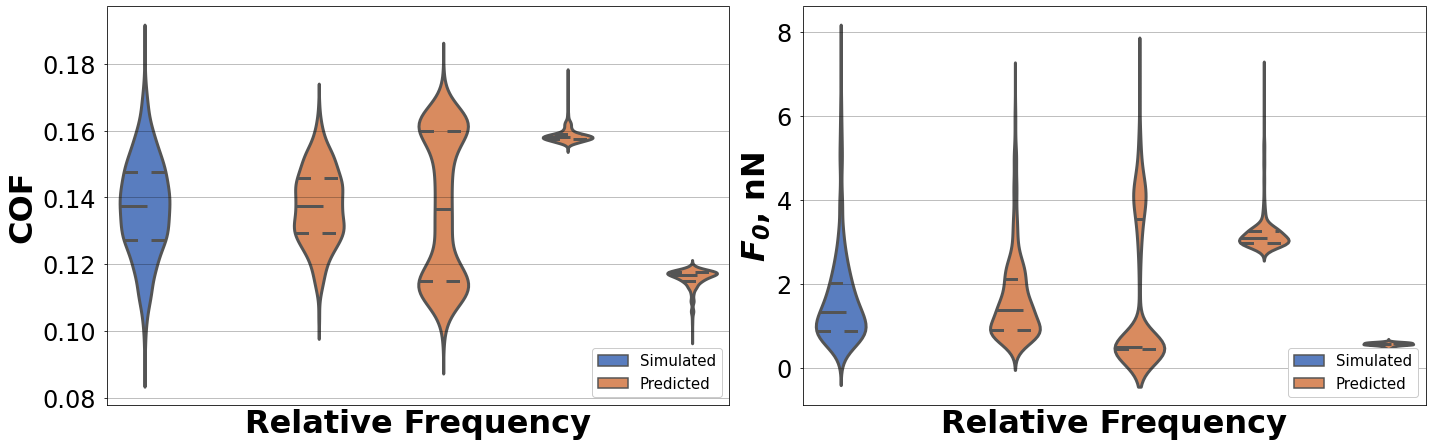

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2, 2, 1)
sns.violinplot(x='set', y='COF', data=COF_df, color="0.8", hue='mode', scale='area', bw='scott',
               split=False, palette='muted', inner="quart")
plt.xlabel('Relative Frequency')
plt.ylabel('COF')
plt.xticks([], color='None')
#plt.yticks([], color='None')
plt.legend(loc=4)

plt.subplot(2, 2, 2)
sns.violinplot(x='set', y='intercept', data=F0_df, color="0.8", hue='mode', scale='area', bw='scott',
               split=False, palette='muted', inner="quart")
plt.xlabel('Relative Frequency')
plt.ylabel(r'$\mathbf{F_0}$, nN')
plt.xticks([], color='None')
#plt.yticks([], color='None')
plt.legend(loc=4)